In [2]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import re
import time
import numpy as np

In [3]:
# Initialize an EasyOCR reader for French language ('fr'), using GPU for processing
reader = easyocr.Reader(['fr'], gpu=True)

In [3]:
def draw_bounding_boxes(image, detections, threshold=0.25):
    """
    This function draws bounding boxes and labels on the image for the given detections.

    Parameters:
    image (numpy array): The image on which to draw bounding boxes. It's a numpy array as images are represented as multi-dimensional numpy arrays.
    detections (list): A list of detections. Each detection is a tuple containing the bounding box coordinates, the detected text, and the confidence score.
    threshold (float): The confidence threshold. Detections with a confidence score below this threshold will be ignored.

    The function modifies the input image in-place by drawing bounding boxes and labels on it.

    The bounding box is drawn using the cv2.rectangle function, which takes the top-left and bottom-right coordinates of the rectangle, the color of the rectangle (in BGR format), and the thickness of the lines that make up the rectangle.

    The label is drawn using the cv2.putText function, which takes the top-left coordinate of the text, the text itself, the font type, the font scale, the color of the text (in BGR format), and the thickness of the text.
    """

    for bbox, text, score in detections:
        if score > threshold:
            # Draw bounding box
            cv2.rectangle(image, tuple(map(int, bbox[0])), tuple(map(int, bbox[2])), (0, 0, 255), 5)
            # Draw label
            cv2.putText(image, text, tuple(map(int, bbox[0])), cv2.FONT_HERSHEY_SIMPLEX, 4, (0, 0, 255), 2)

R : 23
P : None
code champ : 40
M : None
EPO : 197


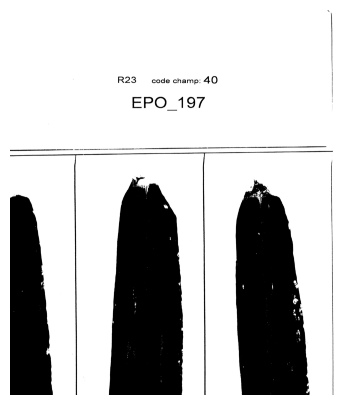

In [153]:
image_path = "/Users/titouanlegourrierec/Desktop/results_text/WURUUSRRSASSNOAROSAIGESESESEISEREAPAROSDDUNOSE.COescemiceoesmin.cee1555.ebS5.5OEEORSCORSADLO41OPO>4_R23codechamp40_EPO197_(10).jpg.jpg"
img = cv2.imread(image_path)

if img is None:
    raise ValueError("Error loading the image. Please check the file path.")

##############################################################################################################

detections = reader.readtext(img)

# Sort the detections list based on the average y-coordinate of each detection.
# The lambda function calculates the average y-coordinate by taking the y-coordinate of the first and third points of the detection bounding box,
# adding them together and dividing by 2.
# The sorted function sorts the detections in ascending order based on this average y-coordinate.
detections_sorted = sorted(detections, key=lambda detection: (detection[0][0][1] + detection[0][2][1]) / 2)

# supprime elt de detections_sorted si elt[1] = "T"
detections_sorted = [elt for elt in detections_sorted if elt[1] != "T"]

R = None
P = None
code_champ = None
M = None
EPO = None

for elt in detections_sorted:
    if elt[1].startswith('R'):
        #retire le R et enregistre juste le numéro écrit après
        R = elt[1][1:]
        #print(f"R : {R}")

for elt in detections_sorted:
    if elt[1].startswith('P'):
        #retire le R et enregistre juste le numéro écrit après
        P = elt[1][-1]
        #print(f"P : {P}")

#on retire elt[0][1] de groups si il commence par R ou P
detections_sorted = [elt for elt in detections_sorted if not elt[1].startswith('R') and not elt[1].startswith('P')]

# Cette fonction regroupe les détections qui sont presque sur la même ligne.
def group_detections(detections_sorted, threshold):
    # Initialisation de la liste des groupes et du groupe courant.
    groups = []
    current_group = [detections_sorted[0]]

    # Parcours des détections triées.
    for i in range(1, len(detections_sorted)):
        # Récupération de la détection précédente et de la détection courante.
        prev_detection = detections_sorted[i - 1]
        current_detection = detections_sorted[i]

        # Calcul des coordonnées y moyennes de la détection précédente et de la détection courante.
        prev_y = (prev_detection[0][0][1] + prev_detection[0][2][1]) / 2
        current_y = (current_detection[0][0][1] + current_detection[0][2][1]) / 2

        # Si la différence entre les coordonnées y moyennes est inférieure ou égale au seuil,
        # on ajoute la détection courante au groupe courant.
        if abs(current_y - prev_y) <= threshold:
            current_group.append(current_detection)
        # Sinon, on ajoute le groupe courant à la liste des groupes et on initialise un nouveau groupe courant.
        else:
            groups.append(sorted(current_group, key=lambda detection: (detection[0][0][0] + detection[0][2][0]) / 2))
            current_group = [current_detection]

    # Si le groupe courant n'est pas vide, on l'ajoute à la liste des groupes.
    if current_group:
        groups.append(sorted(current_group, key=lambda detection: (detection[0][0][0] + detection[0][2][0]) / 2))

    # La fonction retourne la liste des groupes.
    return groups

# Appel de la fonction avec les détections triées et un seuil de 100.
groups = group_detections(detections_sorted, threshold=100)

for i in range(len(groups)):
    for j in range(len(groups[i])):
        if 'code' in groups[i][j][1] or 'champ' in groups[i][j][1]:
            for elt in groups[i]:
                numbers = re.findall(r'\d+', elt[1])
                for number in numbers:
                    code_champ = number
                    #print(f"code champ : {number}")
            break


for i in range(len(groups)):
    for j in range(len(groups[i])):
        if 'M' in groups[i][j][1]:
            for elt in groups[i]:
                numbers = re.findall(r'\d+', elt[1])
                for number in numbers:
                    M = number
                    #print(f"M : {number}")
            break

for i in range(len(groups)):
    for j in range(len(groups[i])):
        if 'EPO' in groups[i][j][1]:
            for elt in groups[i]:
                numbers = re.findall(r'\d+', elt[1])
                for number in numbers:
                    EPO = number
                    #print(f"EPO : {number}")
            break

print(f"R : {R}")
print(f"P : {P}")
print(f"code champ : {code_champ}")
print(f"M : {M}")
print(f"EPO : {EPO}")

##############################################################################################################
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
import re
from easyocr import Reader

def read_image(img):
    if img is None:
        raise ValueError("Error loading the image. Please check the file path.")
    reader = Reader(['en'])
    detections = reader.readtext(img)
    return detections

def sort_detections(detections):
    detections_sorted = sorted(detections, key=lambda detection: (detection[0][0][1] + detection[0][2][1]) / 2)
    detections_sorted = [elt for elt in detections_sorted if elt[1] != "T"]
    return detections_sorted

def extract_R_P(detections_sorted):
    R = next((elt[1][1:] for elt in detections_sorted if elt[1].startswith('R')), None)
    P = next((elt[1][-1] for elt in detections_sorted if elt[1].startswith('P')), None)
    detections_sorted = [elt for elt in detections_sorted if not elt[1].startswith('R') and not elt[1].startswith('P')]
    return R, P, detections_sorted

def group_detections(detections_sorted, threshold):
    groups = []
    current_group = [detections_sorted[0]]
    for i in range(1, len(detections_sorted)):
        prev_detection = detections_sorted[i - 1]
        current_detection = detections_sorted[i]
        prev_y = (prev_detection[0][0][1] + prev_detection[0][2][1]) / 2
        current_y = (current_detection[0][0][1] + current_detection[0][2][1]) / 2
        if abs(current_y - prev_y) <= threshold:
            current_group.append(current_detection)
        else:
            groups.append(sorted(current_group, key=lambda detection: (detection[0][0][0] + detection[0][2][0]) / 2))
            current_group = [current_detection]
    if current_group:
        groups.append(sorted(current_group, key=lambda detection: (detection[0][0][0] + detection[0][2][0]) / 2))
    return groups

def extract_numbers(groups, keyword):
    for group in groups:
        for detection in group:
            if keyword in detection[1]:
                numbers = re.findall(r'\d+', detection[1])
                if numbers:
                    return numbers[0]
    return None

def process_image(img):
    detections = read_image(img)
    detections_sorted = sort_detections(detections)
    R, P, detections_sorted = extract_R_P(detections_sorted)
    groups = group_detections(detections_sorted, threshold=100)
    code_champ = extract_numbers(groups, 'code')
    M = extract_numbers(groups, 'M')
    EPO = extract_numbers(groups, 'EPO')
    return R, P, code_champ, M, EPO

R, P, code_champ, M, EPO = process_image(img)
print(f"R : {R}")
print(f"P : {P}")
print(f"code champ : {code_champ}")
print(f"M : {M}")
print(f"EPO : {EPO}")

Corrupt JPEG data: 4448 extraneous bytes before marker 0xd0


R : 23
P : 1
code champ : 92
M : 126
EPO : None
Processing time: 2.725 seconds


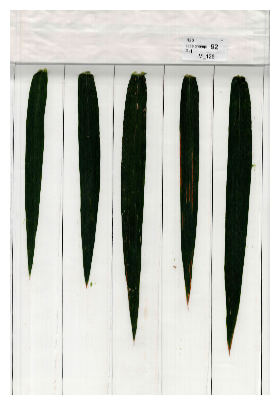

In [167]:
import cv2
import re
from matplotlib import pyplot as plt

##############################################################################################################

def load_image(image_path):
    """
    Load an image from a given file path using OpenCV.

    Parameters:
    image_path (str): The file path of the image to load.

    Returns:
    img (ndarray): The loaded image as a numpy array.

    Raises:
    ValueError: If the image file could not be read (for example, if the file does not exist).
    """

    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Error loading the image. Please check the file path.")
    return img

def read_image(img):
    if img is None:
        raise ValueError("Error loading the image. Please check the file path.")
    reader = Reader(['en'])
    detections = reader.readtext(img)
    return detections

##############################################################################################################

def sort_detections(detections):
    """
    Sort a list of detections based on the average y-coordinate of each detection's bounding box. 
    The average y-coordinate is calculated as the mean of the y-coordinate of the top-left and 
    the bottom-right corners of the bounding box. The list is sorted in ascending order, 
    meaning detections higher in the image (with a smaller y-coordinate) will appear before 
    detections lower in the image.

    Parameters:
    detections (list): A list of detections. Each detection is a tuple where the first element 
                       is a list of bounding box coordinates, the second element is the detected 
                       text, and the third element is the confidence score.

    Returns:
    list: The sorted list of detections.

    Note:
    The bounding box coordinates are expected to be in the format [[x1, y1], [x2, y2], [x3, y3], [x4, y4]] 
    where (x1, y1) is the top-left corner and (x3, y3) is the bottom-right corner.
    """

    return sorted(detections, key=lambda detection: (detection[0][0][1] + detection[0][2][1]) / 2)

##############################################################################################################

def remove_unwanted_elements(detections, unwanted_elements):
    """
    Remove unwanted detections from a list of detections.

    Parameters:
    detections (list): A list of detections. Each detection is a tuple where the second element 
                       is the detected text.
    unwanted_elements (list): A list of strings representing the detected text of unwanted detections.

    Returns:
    list: The list of detections after unwanted detections have been removed.

    Note:
    This function uses list comprehension to create a new list that only includes detections 
    whose detected text is not in the list of unwanted elements.
    """
    return [elt for elt in detections if elt[1] not in unwanted_elements]

##############################################################################################################

def get_value_starting_with(detections, start_char):
    """
    Search through a list of detections and return the detected text of the first detection 
    that starts with a specific character, excluding that character.

    Parameters:
    detections (list): A list of detections. Each detection is a tuple where the second element 
                       is the detected text.
    start_char (str): The character that the desired detection's text should start with.

    Returns:
    str: The detected text of the first detection that starts with `start_char`, excluding `start_char`. 
         If no such detection is found, return None.

    Note:
    This function uses a for loop to iterate over the list of detections. For each detection, 
    it checks if the detected text starts with `start_char` using the `str.startswith` method. 
    If it finds a match, it returns the detected text excluding the first character (i.e., `start_char`). 
    If it doesn't find a match after checking all detections, it returns None.
    """
    for elt in detections:
        if elt[1].startswith(start_char):
            return elt[1][1:]
    return None

##############################################################################################################

def remove_elements_starting_with(detections, start_chars):
    """
    Remove detections from a list of detections if their detected text starts with any of the specified characters.

    Parameters:
    detections (list): A list of detections. Each detection is a tuple where the second element 
                       is the detected text.
    start_chars (list): A list of characters. Detections whose detected text starts with any of these 
                        characters will be removed.

    Returns:
    list: The list of detections after detections with unwanted starting characters have been removed.

    Note:
    This function uses list comprehension to create a new list that only includes detections 
    whose detected text does not start with any of the characters in `start_chars`. It uses the 
    `str.startswith` method to check if the detected text starts with each character.
    """
    return [elt for elt in detections if not any(elt[1].startswith(char) for char in start_chars)]

##############################################################################################################

def get_number_from_groups(groups, keywords):
    """
    Search through a nested list of groups for a keyword and return the first number found in the same group.

    Parameters:
    groups (list): A nested list where each inner list represents a group. Each group is a list of detections, 
                   and each detection is a tuple where the second element is the detected text.
    keywords (list): A list of keywords to search for in the detected text of the detections.

    Returns:
    str: The first number found in the detected text of the detections in the same group as a keyword. 
         The number is returned as a string. If no number is found, return None.

    Note:
    This function uses nested for loops to iterate over the groups and the detections within each group. 
    For each detection, it checks if any of the keywords are in the detected text. If a keyword is found, 
    it then searches for a number in the detected text of all detections in the same group using the 
    `re.findall` function with a regular expression that matches any sequence of digits. It returns the 
    first number found, or None if no number is found.
    """
    for i in range(len(groups)):
        for j in range(len(groups[i])):
            if any(keyword in groups[i][j][1] for keyword in keywords):
                for elt in groups[i]:
                    numbers = re.findall(r'\d+', elt[1])
                    if numbers:
                        return numbers[0]
    return None

##############################################################################################################

def display_image(img):
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

##############################################################################################################

def process_image(img, reader, threshold=100):
    """
    Process an image to extract certain information and measure the processing time.

    Parameters:
    img (numpy.ndarray): The image to process.
    reader (easyocr.Reader): The OCR reader to use for text detection.
    threshold (int, optional): The threshold to use for grouping detections. Default is 100.

    Returns:
    tuple: A tuple containing the values of R, P, code_champ, M, EPO, and the processing time in seconds.
    """
    start_time = time.time()

    detections = reader.readtext(img)
    detections_sorted = sort_detections(detections)
    detections_sorted = remove_unwanted_elements(detections_sorted, ['T'])

    R = get_value_starting_with(detections_sorted, 'R')
    P = get_value_starting_with(detections_sorted, 'P')[-1]
    detections_sorted = remove_elements_starting_with(detections_sorted, ['R', 'P'])

    groups = group_detections(detections_sorted, threshold=threshold)

    code_champ = get_number_from_groups(groups, ['code', 'champ'])
    M = get_number_from_groups(groups, ['M'])
    EPO = get_number_from_groups(groups, ['EPO'])

    processing_time = time.time() - start_time

    return R, P, code_champ, M, EPO, processing_time

image_path = "/Users/titouanlegourrierec/Desktop/all_scan_data/all_090523/44.jpg"
img = load_image(image_path)

R, P, code_champ, M, EPO, processing_time = process_image(img, reader)
print(f"R : {R}")
print(f"P : {P}")
print(f"code champ : {code_champ}")
print(f"M : {M}")
print(f"EPO : {EPO}")
print(f"Processing time: {processing_time:.3f} seconds")

display_image(img)

---

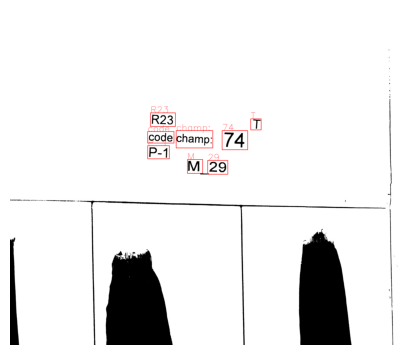

[([[1870, 1382], [2203, 1382], [2203, 1564], [1870, 1564]],
  'R23',
  0.9994991735297615),
 ([[3206, 1462], [3345, 1462], [3345, 1609], [3206, 1609]],
  'T',
  0.9638834101275648),
 ([[1833, 1631], [2184, 1631], [2184, 1784], [1833, 1784]],
  'code',
  0.9999962449073792),
 ([[2825, 1618], [3166, 1618], [3166, 1873], [2825, 1873]],
  '74',
  0.9999880303160049),
 ([[1834, 1819], [2122, 1819], [2122, 1994], [1834, 1994]],
  'P-1',
  0.996695524660274),
 ([[2363, 2003], [2566, 2003], [2566, 2187], [2363, 2187]],
  'M',
  0.9998123733800099),
 ([[2633, 2015], [2901, 2015], [2901, 2199], [2633, 2199]],
  '29',
  0.9562829692951156),
 ([[2213.9597433162025, 1618.027071671089],
   [2733.700283855966, 1685.550533955181],
   [2701.0402566837975, 1849.972928328911],
   [2180.299716144034, 1782.449466044819]],
  'champ:',
  0.6259635409706155)]

In [129]:
image_path = "/Users/titouanlegourrierec/Desktop/results_text/R23_codechamp4_M_29_r_(4).jpg.jpg"
img = cv2.imread(image_path)

if img is None:
    raise ValueError("Error loading the image. Please check the file path.")

detections = reader.readtext(img)

draw_bounding_boxes(img, detections)

plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

detections

In [9]:
def text_box(image, detections):
    """
    Extract the part of the image within the bounding box that encompasses all detections.

    Parameters:
    image (numpy.ndarray): The image from which to extract the part.
    detections (list): A list of detections. Each detection is a tuple containing the bounding box coordinates, 
                       the detected text, and the detection score.
    threshold (float, optional): The threshold to use for filtering detections. Only detections with a score 
                                 greater than this threshold are considered. Default is 0.25.

    Returns:
    numpy.ndarray: The part of the image within the bounding box that encompasses all detections. 
                   If there are no detections above the threshold, return None.

    Note:
    This function creates a list to store the coordinates of all detected bounding boxes. 
    For each detection, if the detection score is above the threshold, it extracts the coordinates of the 
    current bounding box and adds them to the list. It then calculates the coordinates of the encompassing 
    bounding box and crops the image to this bounding box.
    """

    all_bboxes = []

    for bbox, _, _ in detections:
        x_min, y_min = map(int, bbox[0])
        x_max, y_max = map(int, bbox[2])

        all_bboxes.append((x_min, y_min, x_max, y_max))

    # Calculate the coordinates of the encompassing bounding box
    if all_bboxes:
        x_min = min(bbox[0] for bbox in all_bboxes)
        y_min = min(bbox[1] for bbox in all_bboxes)
        x_max = max(bbox[2] for bbox in all_bboxes)
        y_max = max(bbox[3] for bbox in all_bboxes)

        cropped_image = image[y_min:y_max, x_min:x_max]

        #diminue les dimensions de l'image pour économiser de la mémoire
        cropped_image = cv2.resize(cropped_image, (0, 0), fx=0.10, fy=0.10)
        #convert to grayscale
        cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

        return cropped_image

Corrupt JPEG data: 4398 extraneous bytes before marker 0xd4


Temps d'exécution : 0.000 secondes


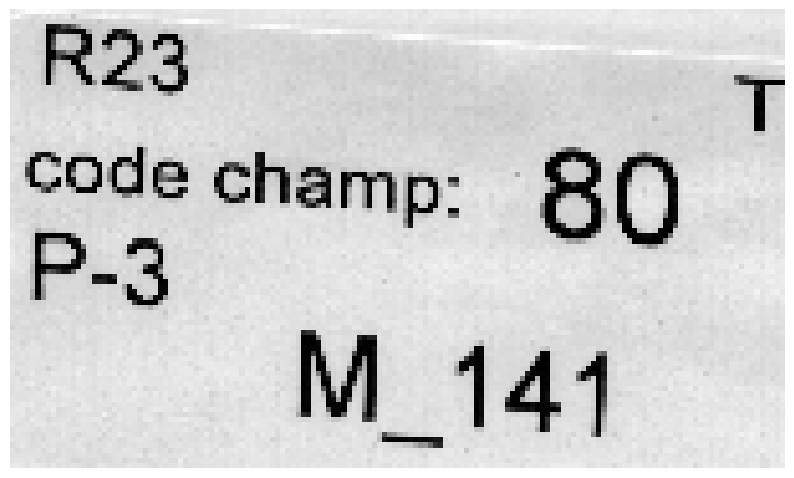

In [10]:
image_path = "/Users/titouanlegourrierec/Desktop/all_scan_data/all_090523/51.jpg"

img = cv2.imread(image_path)

if img is None:
    raise ValueError("Erreur lors du chargement de l'image. Veuillez vérifier le chemin du fichier.")

reader = easyocr.Reader(['fr'], gpu=True)

text_detections = reader.readtext(img)

time1 = time.time()
cropped_image = text_box(img, text_detections)
time2 = time.time()
print(f"Temps d'exécution : {time2 - time1:.3f} secondes")

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Masquer les axes
plt.show()

In [204]:
# without resizing and converting to grayscale

# display the shape of the cropped image
print(f"dims: {cropped_image.shape}")
# display the size of the cropped image in kilobytes
print(f"size: {cropped_image.nbytes / 1024:.2f} KB")

dims: (896, 1521, 3)
size: 3992.62 KB


In [11]:
# with resizing and converting to grayscale

# display the shape of the cropped image
print(f"dims: {cropped_image.shape}")
# display the size of the cropped image in kilobytes
print(f"size: {cropped_image.nbytes / 1024:.2f} KB")

dims: (90, 152)
size: 13.36 KB
